The dataset can be found at - https://archive.ics.uci.edu/ml/machine-learning-databases/autos

In [1]:
from google.colab import files
uploaded = files.upload()

Saving automobiles.csv to automobiles.csv


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import io
import math
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import scipy
from scipy.stats.contingency import crosstab

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,10)

In [4]:
df = pd.read_csv(io.BytesIO(uploaded['automobiles.csv']), header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [5]:
column_names = ['symboling','normalized_losses','make','fuel_type','aspiration','num_of_doors','body_style','drive_wheels',
                'engine_location','wheel_base','length','width','height','curb_weight','engine_type','num_cylinders','engine_size',
                'fuel_sys','bore','stroke','compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg','price']
df.columns = column_names
df.describe(include='all')

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_sys,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,205.000000,205,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205,205,205.000000,205,205,205.000000,205.000000,205
unique,NaN,52,22,2,2,3,5,3,2,NaN,...,NaN,8,39,37,NaN,60,24,NaN,NaN,187
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,?
freq,NaN,41,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,4
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


In [8]:
df.dropna(subset=['price'],axis=0,inplace=True)
#Since we are predicting price, the rows that have price as NaN can be dropped

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_of_doors       205 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_cylinders      205 non-null    object 
 16  engine_size        205 non

In [10]:
df['normalized_losses'] = df['normalized_losses'].replace([np.NaN,'?'], '0')
df['bore'] = df['bore'].replace(['?'], '0')
df['stroke'] = df['stroke'].replace([np.NaN,'?'], '0')
df['horsepower'] = df['horsepower'].replace([np.NaN,'?'], '0')
df['peak_rpm'] = df['peak_rpm'].replace([np.NaN,'?'], '0')
df['price'] = df['price'].replace(['?'], '0')

df['normalized_losses'] = df['normalized_losses'].astype('str').astype('float64')
df['bore'] = df['bore'].astype('str').astype('float64')
df['stroke'] = df['stroke'].astype('str').astype('float64')
df['horsepower'] = df['horsepower'].astype('str').astype('float64')
df['peak_rpm'] = df['peak_rpm'].astype('str').astype('float64')
df['price'] = df['price'].astype('str').astype('float64')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_of_doors       205 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_cylinders      205 non-null    object 
 16  engine_size        205 non

In [11]:
normalised_losses_mean = df['normalized_losses'].mean()
df['normalized_losses'].replace(0,normalised_losses_mean) 

horsepower_mean = df['horsepower'].mean()
df['horsepower'].replace(0,horsepower_mean)

0      111.0
1      111.0
2      154.0
3      102.0
4      115.0
       ...  
200    114.0
201    160.0
202    134.0
203    106.0
204    114.0
Name: horsepower, Length: 205, dtype: float64

In [12]:
#Min Max normalization
min_length = df['length'].min()
max_lenth = df['length'].max()
diff = max_lenth - min_length
df['length'] = (df['length']-min_length)/diff

In [13]:
#Data Binning for price column
bins = np.linspace(min(df['price']),max(df['price']),4)
group_names = ['low','medium','high']
df['binned_price'] = pd.cut(df['price'], bins, labels = group_names, include_lowest = True)

In [14]:
drive_wheel_counts = df['drive_wheels'].value_counts().to_frame()
drive_wheel_counts

,drive_wheels
fwd,120
rwd,76
4wd,9


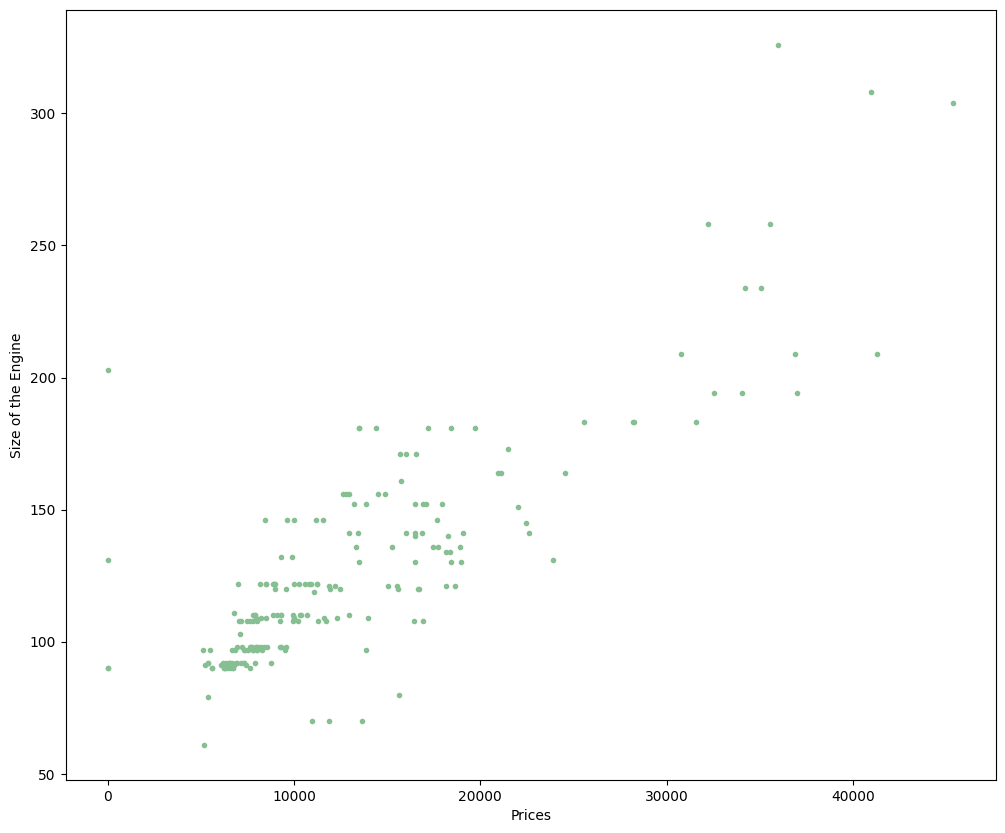

In [15]:
#Hypothesis : Bigger the size of the engine, higher the price of the autmobile
plt.scatter(df['price'],df['engine_size'], marker='.', c='#86bf91')
plt.xlabel('Prices')
plt.ylabel('Size of the Engine')
plt.show()

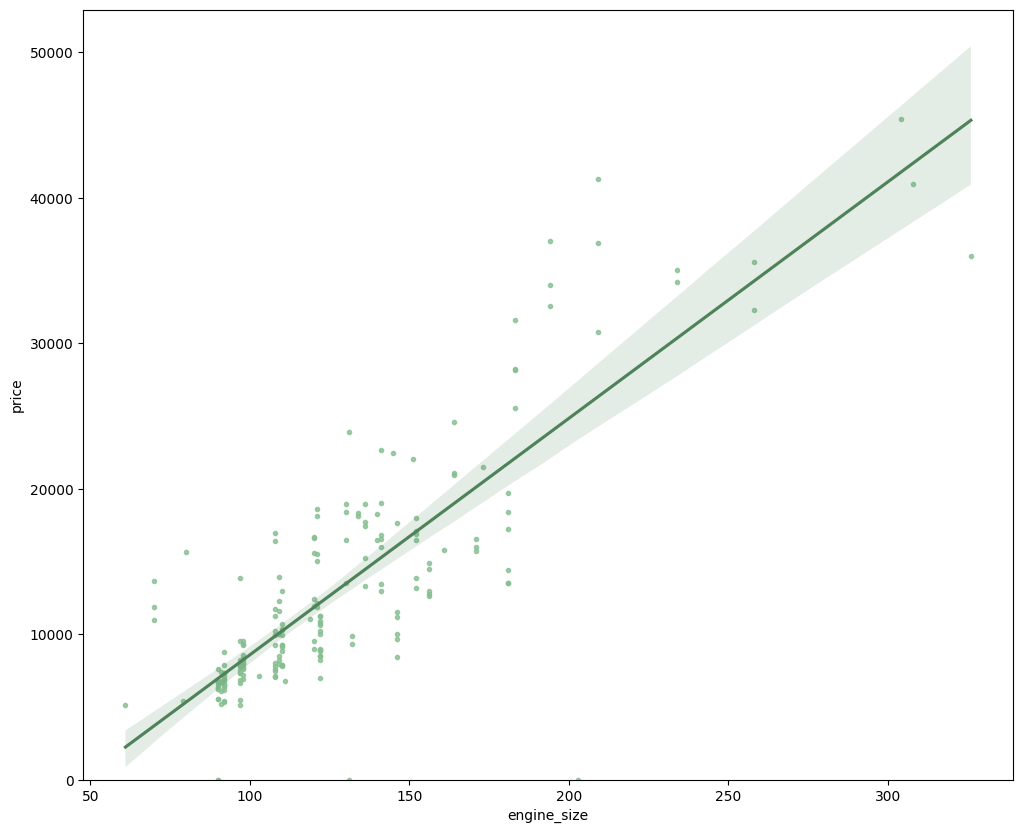

In [16]:
#we see a positive correlation between the size of the engine and the price of the automobile
sns.regplot(x=df['engine_size'],y=df['price'], data=df, scatter_kws ={'color':'#86bf91'}, line_kws={'color':'#4e8258'}, marker='.')
plt.ylim(0,)
plt.show()

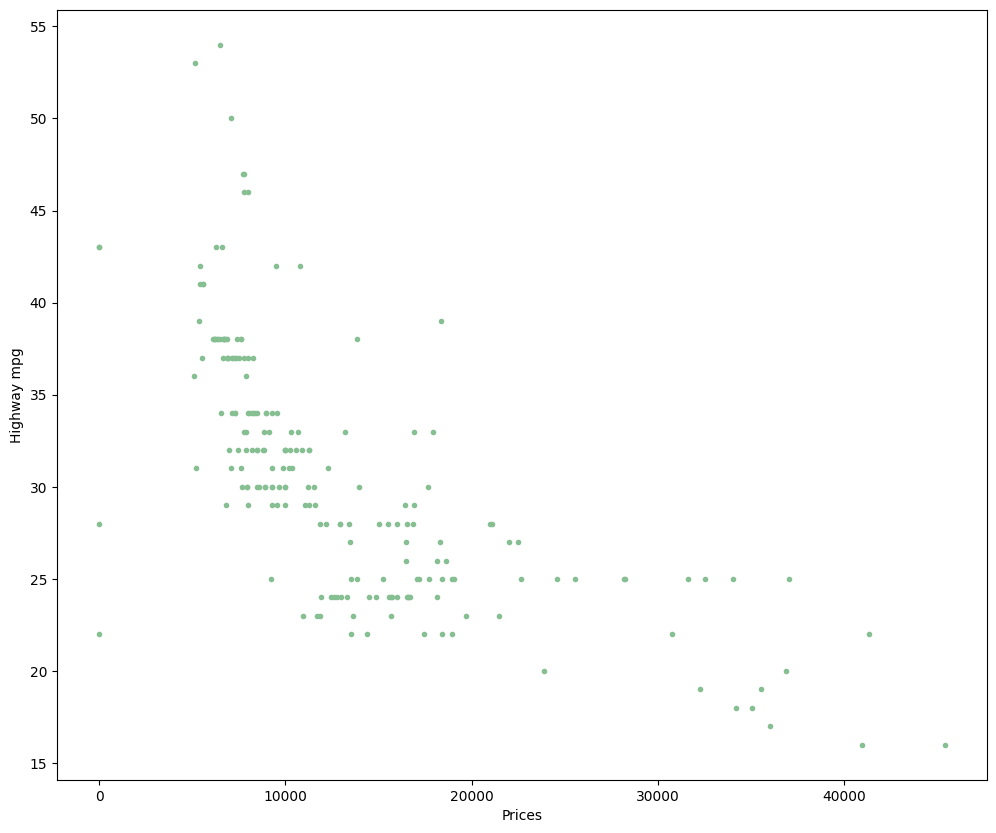

In [17]:
#Hypothesis : Higher the mpg, lower the price of the autmobile
plt.scatter(df['price'],df['highway_mpg'], marker='.', c='#86bf91')
plt.xlabel('Prices')
plt.ylabel('Highway mpg')
plt.show()

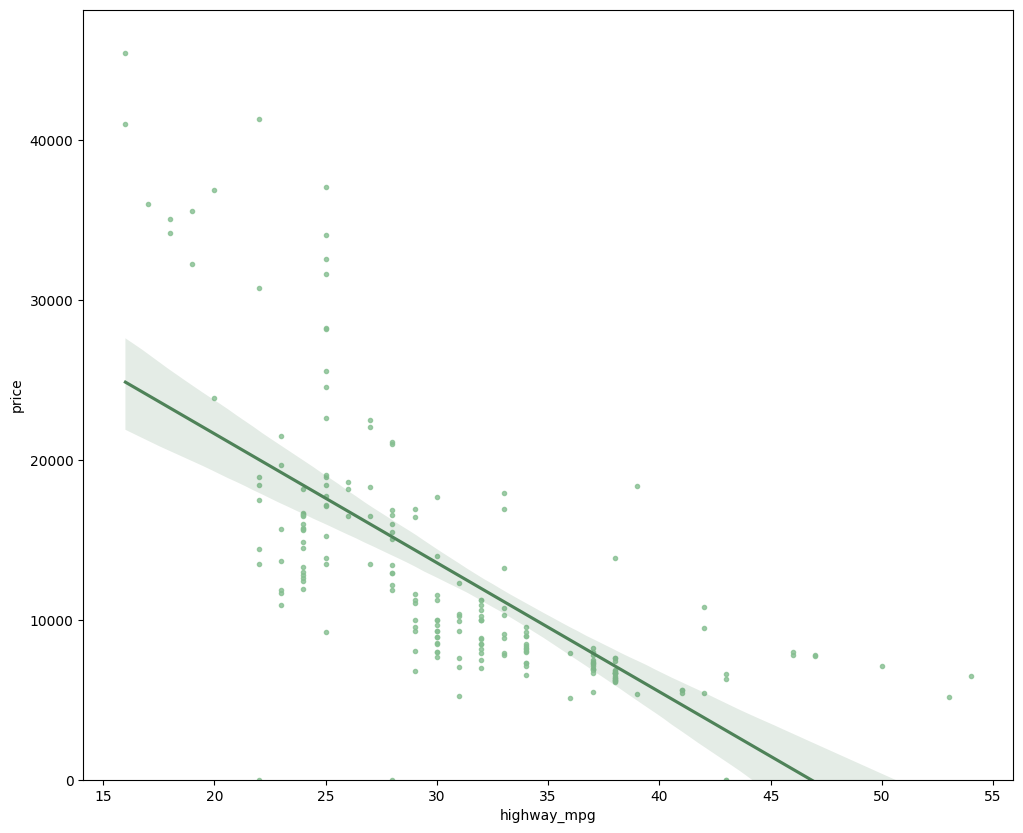

In [18]:
#we see a negative linear relationship between the highway mpg and the price of the automobile
#since the slope is steep, highway mpg is still a good predictor of the autmobile price
sns.regplot(x=df['highway_mpg'],y=df['price'], data=df, scatter_kws ={'color':'#86bf91'}, line_kws={'color':'#4e8258'}, marker='.')
plt.ylim(0,)
plt.show()

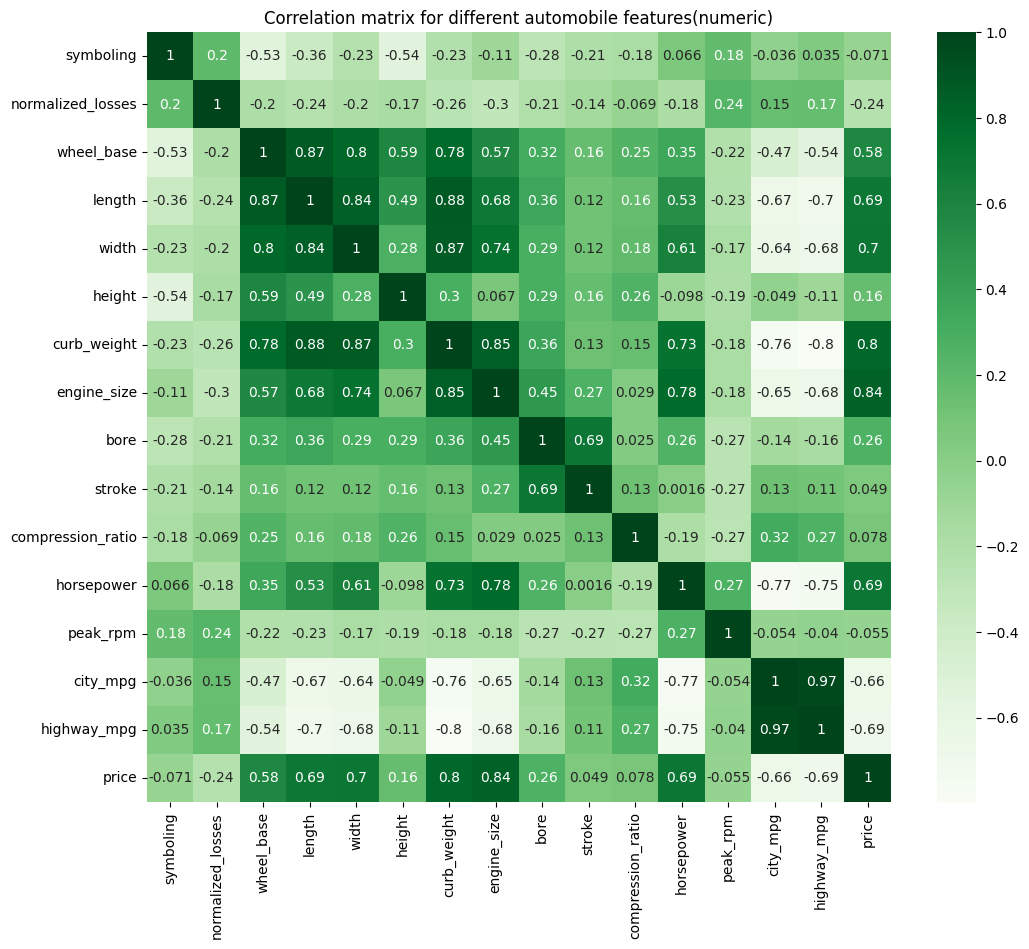

In [19]:
#Pearson Correlation
#correlation matrix visualisation
cmat = df.corr(method="pearson")
sns.heatmap(cmat, annot = True, cmap="Greens")
plt.title('Correlation matrix for different automobile features(numeric)')
plt.show()

In [20]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [21]:
x = df[['highway_mpg']]
y = df['price']
lm.fit(x,y)
yhat = lm.predict(x) 
c = lm.intercept_
a = lm.coef_
lm.score(x,y)
# price = a*highway_mpg + c defines the linear relationship between highway_mpg and price

0.47289700751877217

<Axes: xlabel='highway_mpg', ylabel='price'>

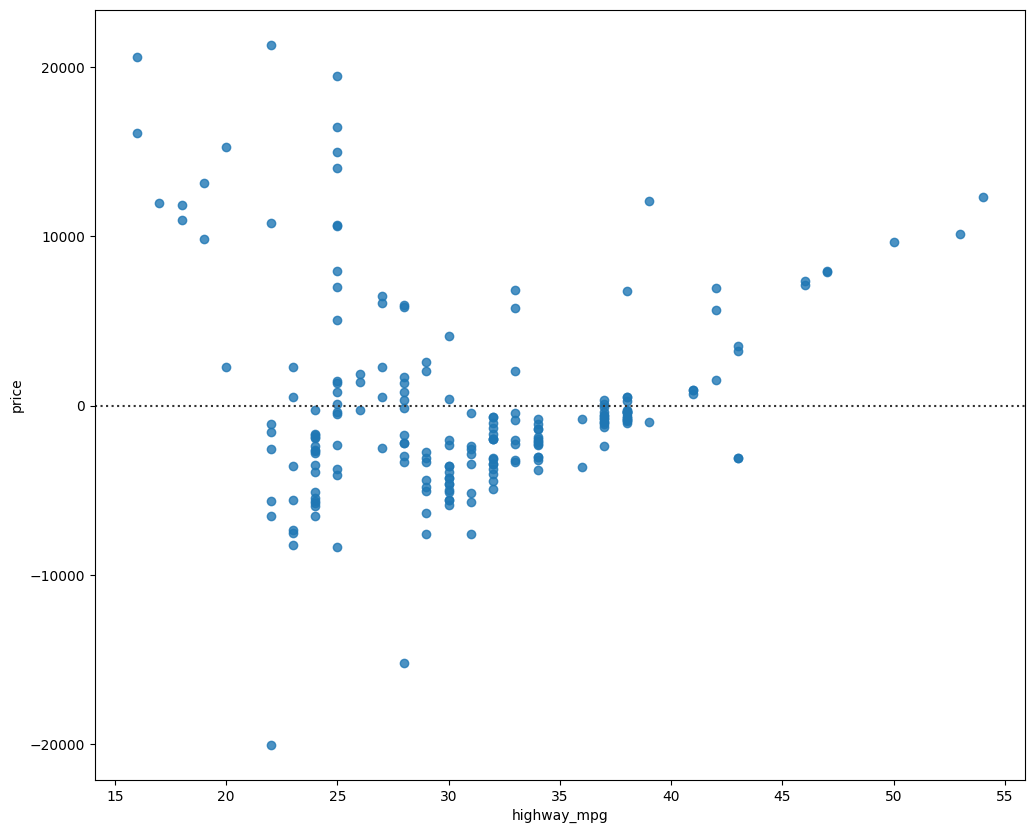

In [22]:
sns.residplot(x=df['highway_mpg'],y=df['price'])
#The residual plot reflects a curvature implying that a linear regression model is not suitable.

In [23]:
z = df[['highway_mpg','horsepower','curb_weight','engine_size']]
lm.fit(z,y)
yhat = lm.predict(z)
b0 = lm.intercept_
bs = lm.coef_
lm.score(z,y)
# price = b0 + bs[0]*highway_mpg + bs[1]*horsepower + bs[2]*curb_weight + bs[3]*engine_size is the multiple linear relationship

0.7368395989355068

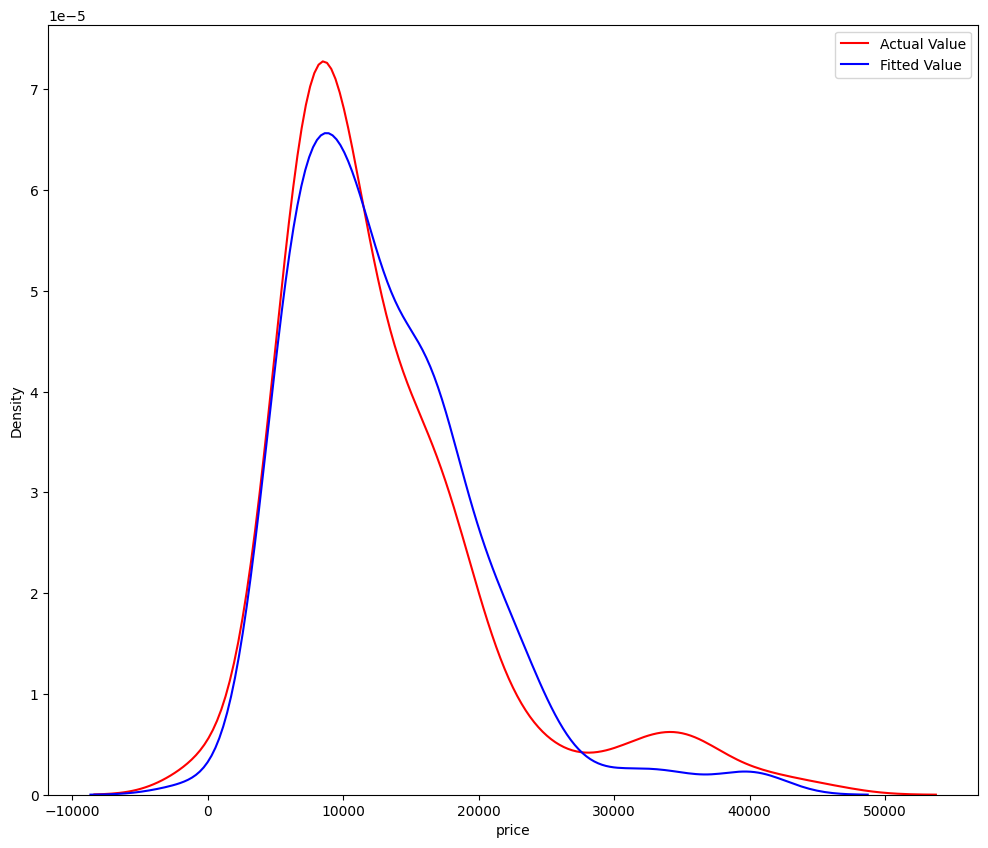

In [24]:
ax1 = sns.distplot(df['price'],hist=False,color='r',label='Actual Value')
sns.distplot(yhat, hist=False, color='b', label='Fitted Value', ax=ax1)
plt.legend()
plt.show()

The graph shows that the multiple linear regression model is more suitable than the linear regression model as the fitted values are much closer to the actual values. However, there is a disparity in the automobile price in 30,000-40,000 section. This could mean that a non-linear model would be better suited here.

In [26]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [37]:
pf = PolynomialFeatures(degree=4,include_bias=False)
pf_values = pf.fit_transform(z)
pf.fit(pf_values, y)

pf_reg_model = LinearRegression()
pf_reg_model.fit(pf_values, y)
y_pred = pf_reg_model.predict(pf_values)

coef = pf_reg_model.coef_
intercept = pf_reg_model.intercept_


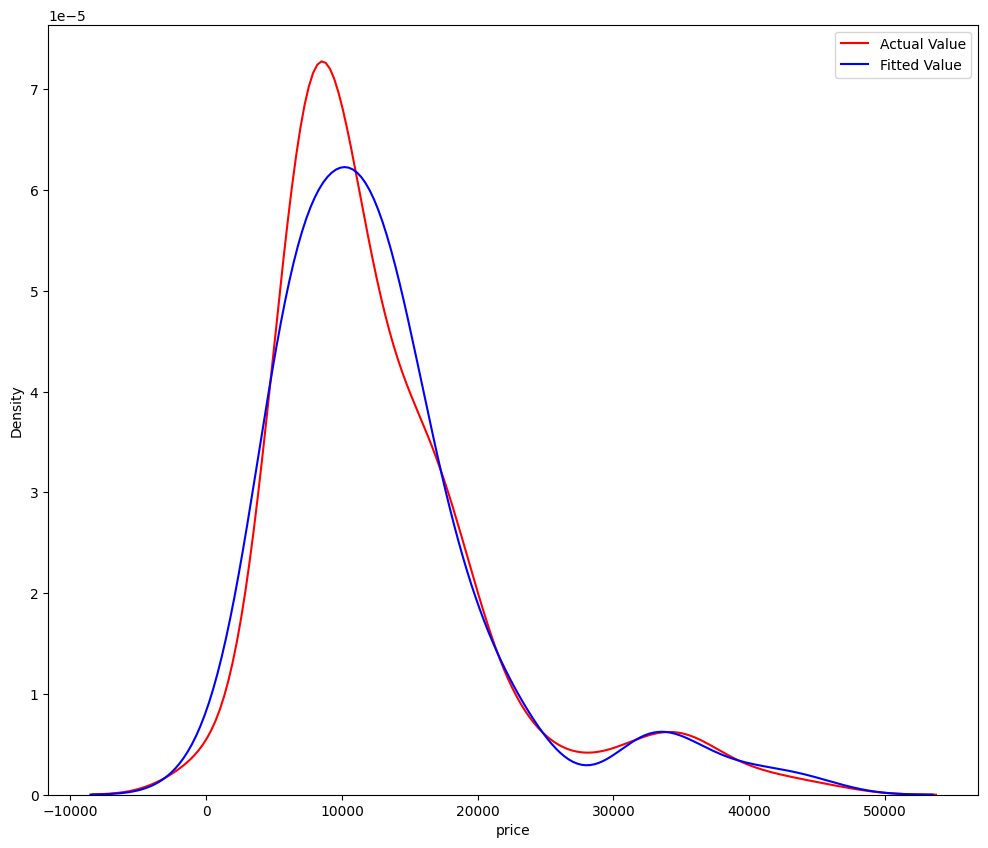

In [38]:
ax2 = sns.distplot(df['price'],hist=False,color='r',label='Actual Value')
sns.distplot(y_pred, hist=False, color='b', label='Fitted Value', ax=ax2)
plt.legend()
plt.show()

As we can see from the above distribution plot, the multivariate polynomial regression is a better fit than the multiple linear regression model, as this accounts for the disparity that was observed in the 30,000-40,000 price range.